In [4]:
import quandl
import zipline
import pandas as pd
from zipline.api import record, symbol, order_target_percent, order
from zipline import run_algorithm
from zipline.finance import commission, slippage
from datetime import datetime
import pytz


In [6]:
%matplotlib inline
%load_ext zipline


In [7]:
%zipline --start=2000-1-1 --end=2020-1-1 -b quantopian-quandl


,AAPL_M,MSFT_M,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2000-01-03 21:00:00+00:00,103.0775,107.4085,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,0.000000,1.000000e+07,...,0.0,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2000-01-04 21:00:00+00:00,102.9245,108.4305,0.000002,-2.000001e-07,NaN,0.000000,0.000000,NaN,-21514.000001,9.978486e+06,...,0.0,0.0,0,-11.224972,1.000000e+07,0.0,0.0,2,"[{'price': 102.50000000489756, 'order_id': 'd5...",0.0
2000-01-05 21:00:00+00:00,102.2495,109.2895,0.000247,2.670000e-05,NaN,0.000000,0.000000,NaN,0.000000,9.978486e+06,...,0.0,0.0,0,1223.547646,9.978486e+06,21512.0,21512.0,3,[],0.0
2000-01-06 21:00:00+00:00,101.5590,110.3300,0.001106,-1.014000e-04,NaN,0.000000,0.000000,NaN,0.000000,9.978486e+06,...,0.0,0.0,0,-6.282833,9.978486e+06,21781.0,21781.0,4,[],0.0
2000-01-07 21:00:00+00:00,100.8060,111.2425,0.001131,-4.200000e-05,NaN,0.000000,0.000000,NaN,0.000000,9.978486e+06,...,0.0,0.0,0,-2.327174,9.978486e+06,20500.0,20500.0,5,[],0.0
2000-01-10 21:00:00+00:00,100.5185,112.1770,0.001012,-5.140000e-05,NaN,0.000000,0.000000,NaN,0.000000,9.978486e+06,...,0.0,0.0,0,-2.593026,9.978486e+06,21094.0,21094.0,6,[],0.0
2000-01-11 21:00:00+00:00,100.2560,113.0960,0.001015,-1.302000e-04,NaN,0.000000,0.000000,NaN,0.000000,9.978486e+06,...,0.0,0.0,0,-5.183983,9.978486e+06,21000.0,21000.0,7,[],0.0
2000-01-12 21:00:00+00:00,99.9435,113.7335,0.001024,-2.214000e-04,NaN,0.000000,0.000000,NaN,0.000000,9.978486e+06,...,0.0,0.0,0,-7.054686,9.978486e+06,20212.0,20212.0,8,[],0.0
2000-01-13 21:00:00+00:00,99.5595,114.0895,0.001222,-1.058000e-04,NaN,0.000000,0.000000,NaN,0.000000,9.978486e+06,...,0.0,0.0,0,-3.177746,9.978486e+06,19300.0,19300.0,9,[],0.0
2000-01-14 21:00:00+00:00,99.5470,114.0580,0.001243,-2.450000e-05,NaN,0.000000,0.000000,NaN,0.000000,9.978486e+06,...,0.0,0.0,0,-0.697450,9.978486e+06,20456.0,20456.0,10,[],0.0


In [8]:
stocks = ['AAPL', 'MSFT']


In [9]:
def initialize(context):
    context.has_ordered = False
    context.stocks = stocks
    context.AAPL = symbol('AAPL')
    context.MSFT = symbol('MSFT')

    # Explicitly set the commission/slippage to the "old" value until we can
    # rebuild example data.
    # github.com/quantopian/zipline/blob/master/tests/resources/
    # rebuild_example_data#L105
    context.set_commission(commission.PerShare(cost=.0075, min_trade_cost=1.0))
    context.set_slippage(slippage.VolumeShareSlippage())



In [10]:
def handle_data(context, data):
    AAPL_p=data.history(context.AAPL, 'close',21, '1d')[:-1].mean()
    MSFT_p=data.history(context.MSFT, 'close',21, '1d')[:-1].mean()
    record(AAPL_M=AAPL_p)
    record(MSFT_M=MSFT_p)
    
    if not context.has_ordered:
        for stock in context.stocks:
            order(symbol(stock), 100)
        context.has_ordered = True

In [11]:
# Set up the stuff for running the trading simulation
base_capital = 10000
start = datetime(2010, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2020, 1, 1, 0, 0, 0, 0, pytz.utc)
# run the trading algorithm and save the results in perf
perf = run_algorithm(start, end, initialize, base_capital, handle_data,
        bundle = 'quantopian-quandl')

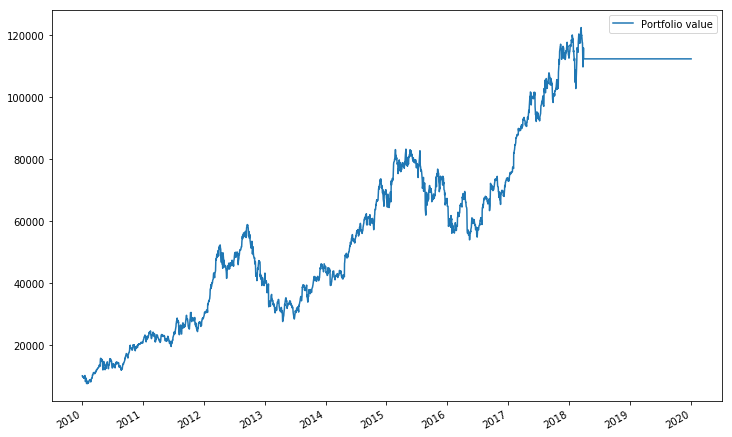

In [12]:
# Draw a nice plot of the value of our portfolio and save it
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
perf.portfolio_value.plot(label="Portfolio value")
# This is was generated by the run_algorithm
plt.legend()
plt.savefig('returns.png')


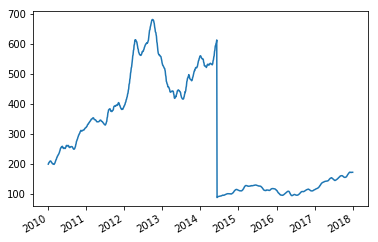

In [115]:
perf.AAPL_M.plot()